# Playing the audio file

In [9]:
from IPython.display import Audio
from scipy.io import wavfile
import numpy as np

ModuleNotFoundError: No module named 'scipy'

In [6]:
file_name = 'sample-audio.wav'

In [7]:
Audio(file_name)

In [8]:
data = wavfile.read(file_name)
framerate = data[0]
sounddata = data[1]
time = np.arange(0,len(sounddata))/framerate
print('Sample rate:',framerate,'Hz')
print('Total time:',len(sounddata)/framerate,'s')

NameError: name 'wavfile' is not defined

# Generating Text from Audio

In [ ]:
#!pip install -q transformers 

ERROR: Could not install packages due to an OSError: [WinError 32] 다른 프로세스가 파일을 사용 중이기 때문에 프로세스가 액세스 할 수 없습니다: 'c:\\users\\kibong\\anaconda3\\envs\\transformers2\\lib\\site-packages\\huggingface_hub-0.0.15-py3.8.egg'
Consider using the `--user` option or check the permissions.



In [ ]:
import soundfile as sf
import librosa
import torch
from transformers import Wav2Vec2Processor, Wav2Vec2ForCTC, Wav2Vec2Model

In [ ]:
tokenizer = Wav2Vec2Processor.from_pretrained("facebook/wav2vec2-base-960h")
model = Wav2Vec2ForCTC.from_pretrained("facebook/wav2vec2-base-960h")

Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebook/wav2vec2-base-960h and are newly initialized: ['wav2vec2.masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
input_audio, _ = librosa.load(file_name, 
                              sr=16000)

In [ ]:
input_values = tokenizer(input_audio, return_tensors="pt").input_values
logits = model(input_values).logits
predicted_ids = torch.argmax(logits, dim=-1)
transcription = tokenizer.batch_decode(predicted_ids)[0]

It is strongly recommended to pass the ``sampling_rate`` argument to this function.Failing to do so can result in silent errors that might be hard to debug.


In [ ]:
transcription

'SUBSCRIBE TO MY CHANNEL'

In [ ]:
np.size(input_audio)

53128

In [ ]:
logits.shape

torch.Size([1, 165, 32])

In [ ]:
import matplotlib as mpl
import matplotlib.pylab as plt

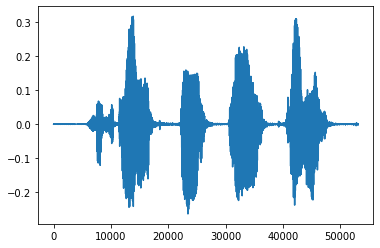

In [ ]:
plt.plot(input_audio)

In [ ]:
aa = input_values.numpy()
bb = aa/20 *1000
print(bb)
print(input_audio * 1000)
print(bb - input_audio * 1000)

[[-0.24475466 -0.4710062  -0.48886532 ... -1.4958538  -2.08282
   0.00841366]]
[-0.23841085 -0.45147398 -0.46829203 ... -1.4165821  -1.9693335
  0.        ]
[[-0.00634381 -0.01953223 -0.02057329 ... -0.07927167 -0.11348641
   0.00841366]]


In [ ]:
np.size(aa)


53128

In [ ]:
transcription

'SUBSCRIBE TO MY CHANNEL'

In [ ]:
input_values

tensor([[-0.0049, -0.0094, -0.0098,  ..., -0.0299, -0.0417,  0.0002]])

In [ ]:
tokenizer

In [ ]:
from transformers import Wav2Vec2Processor, Wav2Vec2Model
from datasets import load_dataset
import soundfile as sf

processor = Wav2Vec2Processor.from_pretrained("facebook/wav2vec2-base-960h")
model = Wav2Vec2Model.from_pretrained("facebook/wav2vec2-base-960h")

def map_to_array(batch):
    speech, _ = sf.read(batch["file"])
    batch["speech"] = speech
    return batch

ds = load_dataset("patrickvonplaten/librispeech_asr_dummy", "clean", split="validation")
ds = ds.map(map_to_array)

input_values = processor(ds["speech"][0], return_tensors="pt").input_values  # Batch size 1
hidden_states = model(input_values).last_hidden_state

Some weights of the model checkpoint at facebook/wav2vec2-base-960h were not used when initializing Wav2Vec2Model: ['lm_head.weight', 'lm_head.bias']
- This IS expected if you are initializing Wav2Vec2Model from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing Wav2Vec2Model from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of Wav2Vec2Model were not initialized from the model checkpoint at facebook/wav2vec2-base-960h and are newly initialized: ['wav2vec2.masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Reusing dataset librispeech_asr (C:\Users\kibong\.cache\huggingface\datasets\librispeech_asr\clean\2.1.0\468ec03

In [ ]:
import torch
from transformers import Wav2Vec2Processor, Wav2Vec2ForCTC
from datasets import load_dataset
import soundfile as sf

processor = Wav2Vec2Processor.from_pretrained("facebook/wav2vec2-base-960h")
model = Wav2Vec2ForCTC.from_pretrained("facebook/wav2vec2-base-960h")

def map_to_array(batch):
    speech, _ = sf.read(batch["file"])
    batch["speech"] = speech
    return batch

ds = load_dataset("patrickvonplaten/librispeech_asr_dummy", "clean", split="validation")
ds = ds.map(map_to_array)

input_values = processor(ds["speech"][0], return_tensors="pt").input_values  # Batch size 1
logits = model(input_values).logits
predicted_ids = torch.argmax(logits, dim=-1)

transcription = processor.decode(predicted_ids[0])

# compute loss
target_transcription = "A MAN SAID TO THE UNIVERSE SIR I EXIST"

# wrap processor as target processor to encode labels
with processor.as_target_processor():
    labels = processor(target_transcription, return_tensors="pt").input_ids

loss = model(input_values, labels=labels).loss

Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebook/wav2vec2-base-960h and are newly initialized: ['wav2vec2.masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Reusing dataset librispeech_asr (C:\Users\kibong\.cache\huggingface\datasets\librispeech_asr\clean\2.1.0\468ec03677f46a8714ac6b5b64dba02d246a228d92cbbad7f3dc190fa039eab1)
Loading cached processed dataset at C:\Users\kibong\.cache\huggingface\datasets\librispeech_asr\clean\2.1.0\468ec03677f46a8714ac6b5b64dba02d246a228d92cbbad7f3dc190fa039eab1\cache-9c5750db106850e1.arrow
It is strongly recommended to pass the ``sampling_rate`` argument to this function.Failing to do so can result in silent errors that might be hard to debug.


In [ ]:
transcription

'SUBSCRIBE TO MY CHANNEL'

In [ ]:
predicted_ids[0]
predicted_ids[0].shape

torch.Size([292])

In [ ]:
aaa = logits.detach().numpy()
logits[0, 40, :]
processor.decode(0)

'<pad>'

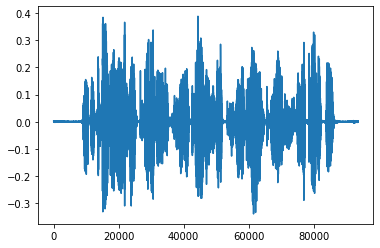

In [ ]:
plt.plot(ds["speech"][0])


In [ ]:
aaa = np.array(ds["speech"][0])
aaa.shape

(93680,)

In [ ]:
model

Wav2Vec2ForCTC(
  (wav2vec2): Wav2Vec2Model(
    (feature_extractor): Wav2Vec2FeatureExtractor(
      (conv_layers): ModuleList(
        (0): Wav2Vec2GroupNormConvLayer(
          (conv): Conv1d(1, 512, kernel_size=(10,), stride=(5,), bias=False)
          (layer_norm): GroupNorm(512, 512, eps=1e-05, affine=True)
        )
        (1): Wav2Vec2NoLayerNormConvLayer(
          (conv): Conv1d(512, 512, kernel_size=(3,), stride=(2,), bias=False)
        )
        (2): Wav2Vec2NoLayerNormConvLayer(
          (conv): Conv1d(512, 512, kernel_size=(3,), stride=(2,), bias=False)
        )
        (3): Wav2Vec2NoLayerNormConvLayer(
          (conv): Conv1d(512, 512, kernel_size=(3,), stride=(2,), bias=False)
        )
        (4): Wav2Vec2NoLayerNormConvLayer(
          (conv): Conv1d(512, 512, kernel_size=(3,), stride=(2,), bias=False)
        )
        (5): Wav2Vec2NoLayerNormConvLayer(
          (conv): Conv1d(512, 512, kernel_size=(2,), stride=(2,), bias=False)
        )
        (6): Wav2Vec